In [1]:
import json
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

In [2]:
protocols = ["grpc", "rmi", "thrift"]
users = [5, 10, 50, 100, 1000, 10000]
results = []

In [3]:
for protocol in protocols:
    for user in users:
        stats_file = f"{protocol}{user}/statistics.json"
        if os.path.exists(stats_file):
            with open(stats_file, "r") as f:
                data = json.load(f)
                total_stats = data["Total"]

                results.append({
                    "Protocol": protocol,
                    "Users": user,
                    "Error Percentile (%)": total_stats["errorPct"],
                    "Mean Response Time (ms)": total_stats["meanResTime"],
                    "Min Response Time (ms)": total_stats["minResTime"],
                    "Max Response Time (ms)": total_stats["maxResTime"],
                    "Median Response Time (ms)": total_stats["medianResTime"],
                    "90th Percentile (ms)": total_stats["pct1ResTime"],
                    "95th Percentile (ms)": total_stats["pct2ResTime"],
                    "99th Percentile (ms)": total_stats["pct3ResTime"],
                    "Throughput (req/s)": total_stats["throughput"]
                })

In [4]:
df = pd.DataFrame(results)
df.to_csv("summary_results.csv", index=False)
print(df)

   Protocol  Users  Error Percentile (%)  Mean Response Time (ms)  \
0      grpc      5              0.000000               428.400000   
1      grpc     10              0.000000                67.500000   
2      grpc     50              0.000000                68.400000   
3      grpc    100              0.000000                92.750000   
4      grpc   1000              0.000000              1411.587000   
5      grpc  10000             33.090000              9510.499300   
6       rmi      5              0.000000               202.200000   
7       rmi     10              0.000000                26.600000   
8       rmi     50              0.000000                20.160000   
9       rmi    100              0.000000                17.770000   
10      rmi   1000              0.000000               134.363000   
11      rmi  10000             20.802958              5745.024438   
12   thrift      5              0.000000               226.400000   
13   thrift     10              0.

In [5]:
desired_users = [5, 10, 50, 100, 500, 1000]
x_labels = list(map(str, desired_users))
user_index = {user: i for i, user in enumerate(desired_users)}

In [6]:
colors = sns.color_palette("husl", n_colors=len(df["Protocol"].unique()))

In [7]:
protocol_labels = {
    "grpc": "gRPC",
    "rmi": "Java RMI",
    "thrift": "Apache Thrift"
}

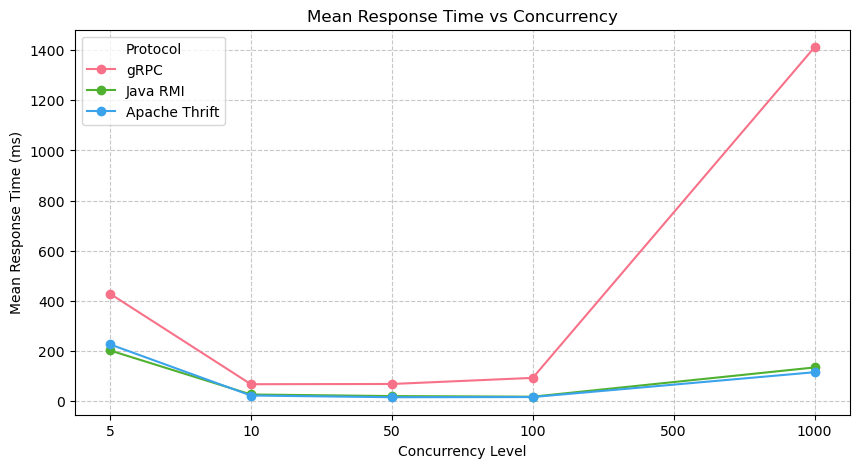

In [8]:
plt.figure(figsize=(10, 5))
for i, protocol in enumerate(df["Protocol"].unique()):
    subset = df[(df["Protocol"] == protocol) & (df["Users"].isin(desired_users))]
    x_positions = [user_index[user] for user in subset["Users"]]
    
    plt.plot(
        x_positions, subset["Mean Response Time (ms)"], 
        marker='o', markersize=6, linestyle='-',
        color=colors[i], label=protocol_labels.get(protocol, protocol)
    )

plt.xticks(range(len(desired_users)), labels=x_labels)
plt.xlabel("Concurrency Level")
plt.ylabel("Mean Response Time (ms)")
plt.title("Mean Response Time vs Concurrency")
plt.legend(title="Protocol")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

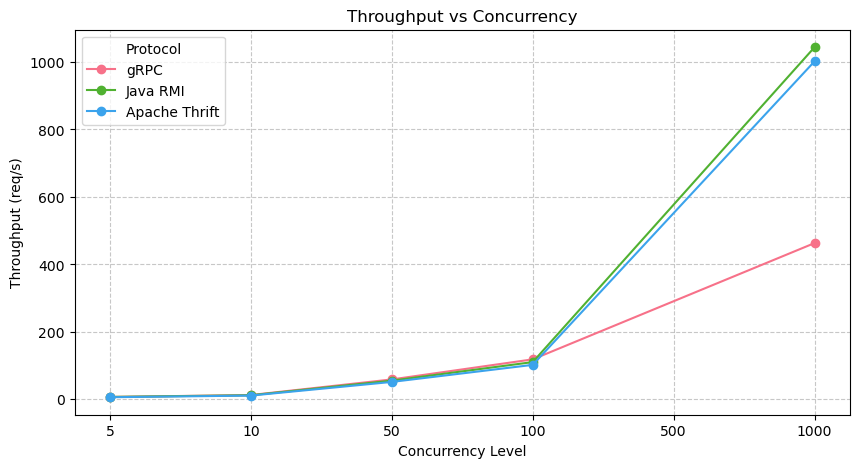

In [9]:
plt.figure(figsize=(10, 5))
for i, protocol in enumerate(df["Protocol"].unique()):
    subset = df[(df["Protocol"] == protocol) & (df["Users"].isin(desired_users))]
    x_positions = [user_index[user] for user in subset["Users"]]
    
    plt.plot(
        x_positions, subset["Throughput (req/s)"], 
        marker='o', markersize=6, linestyle='-',
        color=colors[i], label=protocol_labels.get(protocol, protocol)
    )

plt.xticks(range(len(desired_users)), labels=x_labels)
plt.xlabel("Concurrency Level")
plt.ylabel("Throughput (req/s)")
plt.title("Throughput vs Concurrency")
plt.legend(title="Protocol")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [43]:
df_10000 = df[df["Users"] == 10000].copy()
df_10000["Protocol"] = df_10000["Protocol"].map(protocol_labels)
df_10000 = df_10000.rename(columns={
    "90th Percentile (ms)": "90th Pct (ms)",
    "95th Percentile (ms)": "95th Pct (ms)",
    "99th Percentile (ms)": "99th Pct (ms)"
})

In [45]:
columns = [
    "Protocol", "Mean Response Time (ms)", "Min Response Time (ms)", 
    "Max Response Time (ms)", "Median Response Time (ms)", 
    "90th Pct (ms)", "95th Pct (ms)", "99th Pct (ms)", 
    "Throughput (req/s)"
]

In [47]:
table = tabulate(df_10000[columns], headers="keys", tablefmt="github")
print(table)

|    | Protocol      |   Mean Response Time (ms) |   Min Response Time (ms) |   Max Response Time (ms) |   Median Response Time (ms) |   90th Pct (ms) |   95th Pct (ms) |   99th Pct (ms) |   Throughput (req/s) |
|----|---------------|---------------------------|--------------------------|--------------------------|-----------------------------|-----------------|-----------------|-----------------|----------------------|
|  5 | gRPC          |                   9510.5  |                     2208 |                    17218 |                      9910.5 |         14317.9 |        14660.8  |         14961   |              572.77  |
| 11 | Java RMI      |                   5745.02 |                       27 |                    18044 |                      4528   |         13525   |        14757    |         16986.2 |              496.786 |
| 17 | Apache Thrift |                   3201.55 |                       23 |                    11601 |                      2671.5 |          7063   |